[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/adams/blob/master/demos/feedforward_networks/nn_in_keras.ipynb) 

# Implementing Neural Networks using Keras 

Having build a simple from-scratch NN in the [previus demo](https://github.com/Humboldt-WI/adams/blob/master/demos/feedforward_networks/nn_foundations.ipynb), we are ready to examine the the implementation of deep learning models in Keras. [Keras](https://keras.io/) is one of many programming frameworks for deep learning. As usual, different tools or frameworks have advantages and disadvantages. For Keras, the main advantage is simplicity. It is great for learning and will suffice for many applied deep learning research projects. 

Keras is a high-level API, meaning that you need a partnering tool, a deep learning workhorse if you wish, that handles the actual computations. Keras supports multiple alternatives but the natural choice is Google's [Tensorflow](https://www.tensorflow.org/). Tensorflow is one of the most popular and powerful deep learning frameworks. In a nutshell, Tensorflow allows you to do everything you can do in Keras and a lot more. However, the downside is that programming in tensorflow is a little more complicated, which makes Keras the better choice for this course. For the sake of completeless, note that other popular and powerful frameworks for deep learning include [PyTorch](https://pytorch.org/) and [MXNet](https://mxnet.apache.org/), to name just a few. Further, an interesting option similar to Keras is [Gluon](https://aws.amazon.com/de/blogs/aws/introducing-gluon-a-new-library-for-machine-learning-from-aws-and-microsoft/), a joint venture of Amazon AWS and Microsoft. Gluon is similar to Keras in that it offers developers an easy way to interface an underlying deep learning framework; in this case MXNet. Gluon is also the framework used in our main text book [Dive into Deep Learning](http://d2l.ai/). And here is just [another GREAT resource](https://gluon.mxnet.io/index.html) for learning about deep learning and Gluon.      

If you are interested in learning a little more about the different options, [this post](https://towardsdatascience.com/top-10-best-deep-learning-frameworks-in-2019-5ccb90ea6de) is a good starting point. 

Enough talking about libraries, frameworks and the like. Let's start with Keras. Our goal is to build a NN for multi-class classification. We need to make several decisions when configuring our NN and focus on these when learning about Keras. Here is the agenda for this demo. 

**Outline**

 1. number of hidden layers
 2. number of neurons in hidden layers
 3. activation functions
 4. type of weight initialization
 5. loss function
 6. learning rate and momentum
 6. optimizer
 7. size of batch
 8. number of epochs
 9. regularization (dropout)

## Use case: app rating analysis 
NNs often solve classification problems with many classes. We will see many examples when coming to the NLP part of the course. To illustrate  a multi-class context that, we will a demo data set concerned with app ratings. The original data is available on [Kaggle](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps). There, you also find a data dictionary with some information on the variables. However, the variable names are rather self-explanatory. A cleaned version of the data is our repo. If you want to examine the preprocessing steps, you can check out the script ([app_store_dpp.py](https://github.com/Humboldt-WI/adams/tree/master/demos/feedforward_networks/app_store_dpp.py)), which starts from the original Kaggle data set and goes through a couple of pre-processing operations to produce the version we use below. 

In [11]:
# Setting up the environment: import standard libraries and load the data. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

# Load dataset and set app name as index
data_file = 'AppleStore_prep.csv' 
X = pd.read_csv(data_file, index_col=False, sep='\t', encoding='utf-8')
X = X.set_index('track_name')
X.head(5)

,size_bytes,price,rating_count_tot,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,currency_USD,cont_rating_12+,cont_rating_17+,...,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,user_rating
track_name,,,,,,,,,,,,,,,,,,,,,
PAC-MAN Premium,-0.273806,0.388126,0.110902,0.170753,0.651051,0.576471,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,0,4.0
Evernote - stay organized,-0.112911,-0.295960,1.956477,-0.096808,0.651051,2.218083,0.083642,1,0,0,...,0,1,0,0,0,0,0,0,0,4.0
"WeatherBug - Local Weather, Radar, Maps, Alerts",-0.274542,-0.295960,2.319827,-0.096808,0.651051,-0.307474,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,1,4.0
"eBay: Best App to Buy, Sell, Save! Online Shopping",-0.196620,-0.295960,3.292413,-0.096808,0.651051,0.450193,0.083642,1,1,0,...,0,0,0,1,0,0,0,0,0,4.0
Bible,-0.296117,-0.295960,12.847931,-0.096808,0.651051,4.996197,0.083642,1,0,0,...,0,0,1,0,0,0,0,0,0,4.0


The target variable in this data set is the user rating of the app.

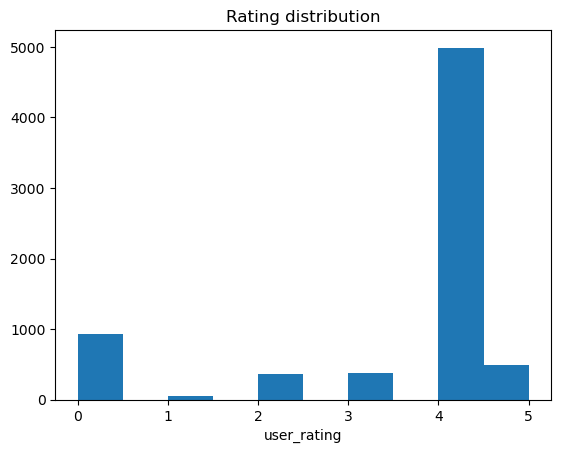

In [12]:
# Show target distribution
plt.hist(X.user_rating)
plt.xlabel('user_rating')
plt.title('Rating distribution')
plt.show();

To train a NN predict this multi-class target, we have to properly encode the target variable. Specifically, we encode it as a dummy vector as follows.

In [13]:
# Dummy encoding of the target
encoder = LabelEncoder()
encoder.fit(X["user_rating"])
y = np_utils.to_categorical( encoder.transform(X["user_rating"]))
X.pop("user_rating")
y

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [14]:
# Split data into training and test set
seed=888
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
    
print (X_train.shape)
print(y_train.shape) 

(5037, 35)
(5037, 6)


## Preparing the Keras framework 

### 1+2: Number of hidden layers and number of neurons
The number of layers and the number of neurons is a parameter that you would have to decide on. 

A *deep* NN is one with more than one hidden layer, so we will use **2 hidden layers** this time.

As to the size of hidden layers, we go for **n=128**.

In [15]:
nb_units = 128

### 3: activation function ###
We will go for industry standard which is **relu** and keep a **softmax** at the end, given our multiclass task. 

### 4: weight initialisation
Weight initialization might seem minor but it can have a major impact on the convergence of the network.

At the picture: all weights are set to 0, second is the normally distributed weights with std=0.4. 
In the rightmost plot, the weights are drawn from normal distributions with variances which are inversely proportional to the number of inputs into each neuron (he normal).

<img src="https://intoli.com/blog/neural-network-initialization/img/training-losses.png"  alt="fwe" style="width: 1000px;"/> 

https://intoli.com/blog/neural-network-initialization/

We will be using the **He Normal initialization**, which is one of the industry standards and recommended for ReLu. It draws samples from a truncated normal distribution with $\mu=0$ and $ \sigma = \sqrt{2 / (d_{l-1})}$. Recall that $d_{l-1}$ refers to the number of nodes in the previous layer and, therefore, the number of inputs to a node in the current layer.

So in our case the standard deviation for our first weight matrix would be:

In [16]:
# If you remember we previously used the (6/(35)) - we used the Glorot uniform (also called Xavier initialization)
std = np.sqrt(2/(X.shape[1])) 
std

0.23904572186687872

## Let's put down what we have decided on already: ##
Keras offer you two "styles" of setting up the structure of your network (they call it two types of model): **sequential** and **functional API** (https://keras.io/models/about-keras-mod). In general, the code is a little easier to read when using the sequential API, whereas the functional API allows for some more flexibility in configuring the network. Since this is the first demo of Keras, we illustrate both options.  Later, we will focus on the sequential API. 

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(nb_units,  #number of neurons
                activation='relu',  #activation function
                kernel_initializer=keras.initializers.he_normal(seed=seed),  #initialisation of weights; check doc for more options
                bias_initializer='zeros', #initialization of biases, will also be done by default
                input_shape=(X.shape[1],))) #first hidden layer size, i.e. number of features
# One more layer with the same configuration
model.add(layers.Dense(nb_units, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=seed), bias_initializer='zeros')) 

# And finally the outout layer
nb_classes = y.shape[1]
model.add(layers.Dense(nb_classes, activation='softmax', kernel_initializer=keras.initializers.he_normal(seed=seed), bias_initializer='zeros')) 

######################let's see how our architecture looks like (also very helpful to learn how many parameters will be trained and compare to
#the size of your training set)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               4608      
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 6)                 774       
                                                                 
Total params: 21,894
Trainable params: 21,894
Non-trainable params: 0
_________________________________________________________________


Let's try to confirm these parameters manually.

In [100]:
# input to hidden layer:

print(X.shape[1] * nb_units + nb_units)

# first hidden to second hidden layer
print(nb_units * nb_units + nb_units)

# second hidden to output layer
print(nb_units * nb_classes)

4608
16512
768


In [101]:
# Functional API analogue
#from keras.layers import Input, Dense
#from keras.models import Model

inputs = layers.Input(shape=(X.shape[1],))
layer1 = layers.Dense(nb_units,  activation='relu', #activation function
                kernel_initializer=keras.initializers.he_normal(seed=seed), #initialisation of weights, 
                bias_initializer='zeros')(inputs)
layer2 = layers.Dense(nb_units,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=seed),bias_initializer='zeros')(layer1)
predictions = layers.Dense(nb_classes, activation='softmax')(layer2)

model = keras.Model(inputs=inputs, outputs=predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 35)]              0         
                                                                 
 dense_104 (Dense)           (None, 128)               4608      
                                                                 
 dense_105 (Dense)           (None, 128)               16512     
                                                                 
 dense_106 (Dense)           (None, 6)                 774       
                                                                 
Total params: 21,894
Trainable params: 21,894
Non-trainable params: 0
_________________________________________________________________


Wonderful, we have set up the infrastructure and can proceed with training
Most of the parameters that define the training process are set within the **compile** and **fit** methods.

The parameter optimization strategy is one of the most important choices for the training of the neural network.

We have already learned about one - stochastic gradient descent, it is considered the basic one. Improved performance can be achieved by using optimizers like **Rmsprop, Adagrad,  Adam**, etc.

### 5+6: loss function, learning rate and optimizer
As discussed before, the loss function is defined by the task (mse, binary cross-entropy, etc.), in our case it is cross-entropy.
Learning rate is set in the optimizer but does not have to remain the same throughout the training (i.e. AdaGrad).

In [102]:
# We use SGD as optimizer and cover more options later on
opt = keras.optimizers.SGD(learning_rate=0.1) # there are many more parameters that we could be adding here

# Calling compile and specifying some mandatory arguments completes setting up the NN
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### 7+8: batch size and epochs ###
The batch size determines how many examples you look at before making a weight update. Put differently, we approximate the gradient of the loss function with respect to the weights based on the error signal from considering *batch size* data points. The lower the batch size, the noisier the training signal is going to be, the higher it is, the longer it will take to compute the gradient for each weight update.

Epochs is the number of rounds the algorithm will go through the entire dataset. Usually the more epochs of training, the better are the results, until the network starts to overfit. When you see the results flattening out, it's the time to stop.

In [103]:
batch_size = 56 #1 for online SGD
epochs = 30

#And now we fit the model (that is the training part), mind that saving it to the 
# variable will help you retrieve and analyse the training history
story = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test) #OR validation_split=0.3
                 ) 

Epoch 1/30
90/90 [==============================] - 1s 4ms/step - loss: 1.0170 - accuracy: 0.6885 - val_loss: 0.9629 - val_accuracy: 0.7023
Epoch 2/30
90/90 [==============================] - 0s 3ms/step - loss: 0.9530 - accuracy: 0.7056 - val_loss: 0.9433 - val_accuracy: 0.7069
Epoch 3/30
90/90 [==============================] - 0s 3ms/step - loss: 0.9327 - accuracy: 0.7052 - val_loss: 0.9338 - val_accuracy: 0.7046
Epoch 4/30
90/90 [==============================] - 0s 2ms/step - loss: 0.9221 - accuracy: 0.7070 - val_loss: 0.9423 - val_accuracy: 0.7069
Epoch 5/30
90/90 [==============================] - 0s 3ms/step - loss: 0.9157 - accuracy: 0.7092 - val_loss: 0.9346 - val_accuracy: 0.7046
Epoch 6/30
90/90 [==============================] - 0s 3ms/step - loss: 0.9054 - accuracy: 0.7105 - val_loss: 0.9304 - val_accuracy: 0.7079
Epoch 7/30
90/90 [==============================] - 0s 3ms/step - loss: 0.8980 - accuracy: 0.7101 - val_loss: 0.9223 - val_accuracy: 0.7069
Epoch 8/30
90/90 [==

The output already provides a lot of information on how well our model performs and whether is shows tendencies of overfitting. You can also obtain such insight explicitly after the model has trained. For example, you can use *evaluate()* to compute model performance. 

In [104]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9444984197616577
Test accuracy: 0.7055555582046509


The metrics that *evaluate()* gives us depend on the input argument *metrics* that we used when setting up our NN. Keras knows several other metrics (see [Keras doc. for details](https://keras.io/metrics/)) but not all known metrics are supported for training the NN. Between, you can also extend the set of metrics with customer metrics (see this [example](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/) if interested.).

We also have access to model performance results via the result of *model.fit()*, that is our variable *story*.

In [105]:
story.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

It is good practice to define custom functions to diagnose model performance and display results as needed. Here are some examples.

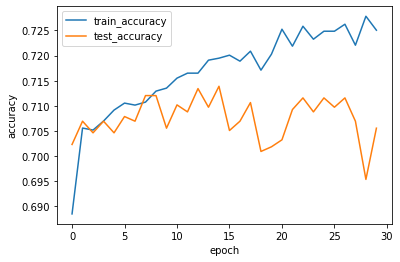

In [106]:
def show_history(story):
    plt.plot(story.history['accuracy'])
    plt.plot(story.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(story)

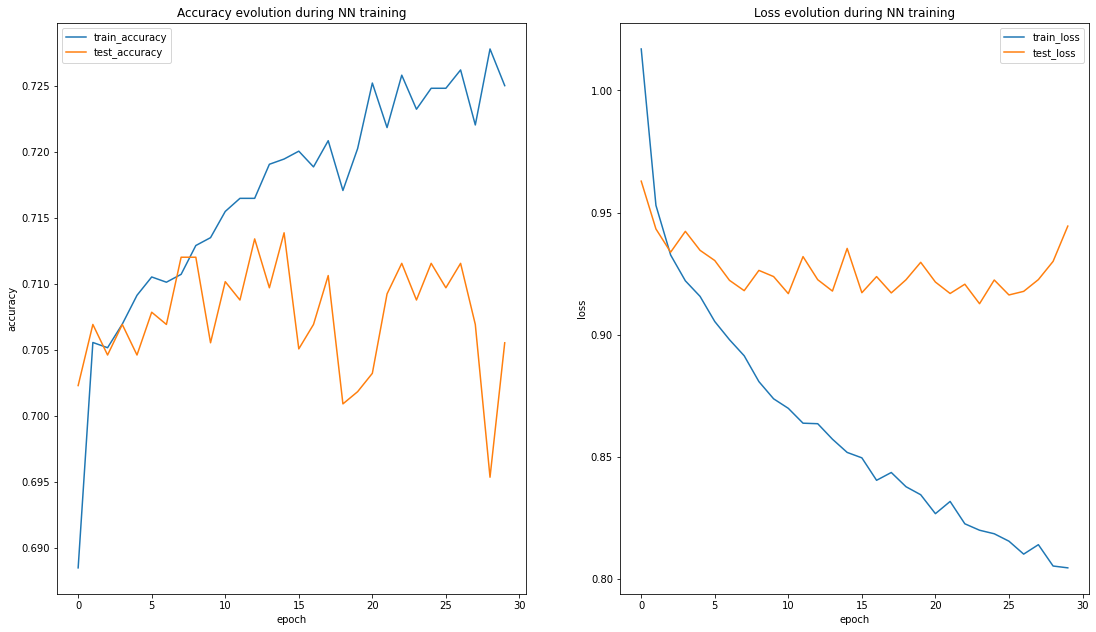

In [107]:
def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'test_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'test_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show()

show_history(story)


To get more insight and benefit from the full stack of performance measures that you know, we can simply calculate test set predictions explicitly and then proceed with these in the usual way, producing ROC curves, confusion tables, and the like.

In [108]:
# Compute predictions
yhat = model.predict(X_test)
yhat.shape

(2160, 6)

In [109]:
# Finding the most probable class
yhat_c = np.argmax(yhat, axis=1)
print(yhat_c)

[4 4 0 ... 4 4 4]


In [110]:
from sklearn.metrics import classification_report
target_names = ["Grade 0","Grade 1","Grade 2","Grade 3","Grade 4","Grade 5"]
true_label = np.argmax(y_test,axis = 1)
print ('\nClasification report:\n', classification_report(true_label, yhat_c, target_names=target_names, zero_division=0))


Clasification report:
               precision    recall  f1-score   support

     Grade 0       0.43      0.41      0.42       268
     Grade 1       0.00      0.00      0.00        15
     Grade 2       0.18      0.02      0.03       105
     Grade 3       0.00      0.00      0.00       116
     Grade 4       0.75      0.94      0.83      1506
     Grade 5       0.00      0.00      0.00       150

    accuracy                           0.71      2160
   macro avg       0.23      0.23      0.21      2160
weighted avg       0.58      0.71      0.63      2160



In [111]:
from sklearn.metrics import confusion_matrix
print ('\nConfusion matrix:\n', confusion_matrix(true_label, yhat_c))


Confusion matrix:
 [[ 109    0    2    0  157    0]
 [   6    0    0    0    9    0]
 [  19    0    2    0   83    1]
 [  15    0    0    0  101    0]
 [  87    0    5    1 1413    0]
 [  15    0    2    1  132    0]]


### 9: dropout
Dropout 'impedes' the model and can be used against overfitting. It randomly sets a fraction rate of input units to 0 at each update during training time, which is a manner of regularization. Let's add up the Dropout rates after the hidden layers.



In [112]:
#Let's add dropout layers to our model (we can leave the bias setting to default this time)
model = keras.Sequential()
model.add(layers.Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed),  input_shape=(35,)))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(nb_classes, activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=seed)))

model.summary()

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #nothing changes here

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 128)               4608      
                                                                 
 dropout_62 (Dropout)        (None, 128)               0         
                                                                 
 dense_108 (Dense)           (None, 128)               16512     
                                                                 
 dropout_63 (Dropout)        (None, 128)               0         
                                                                 
 dense_109 (Dense)           (None, 6)                 774       
                                                                 
Total params: 21,894
Trainable params: 21,894
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
90/90 [==============================] - 1s 5ms/step - loss: 1.0413 - accuracy: 0.6897 - val_loss: 0.9622 - val_accuracy: 0.7009
Epoch 2/30
90/90 [==============================] - 0s 4ms/step - loss: 0.9743 - accuracy: 0.6998 - val_loss: 0.9476 - val_accuracy: 0.7079
Epoch 3/30
90/90 [==============================] - 0s 3ms/step - loss: 0.9562 - accuracy: 0.7002 - val_loss: 0.9370 - val_accuracy: 0.7093
Epoch 4/30
90/90 [==============================] - 0s 3ms/step - loss: 0.9430 - accuracy: 0.7068 - val_loss: 0.9360 - val_accuracy: 0.7079
Epoch 5/30
90/90 [==============================] - 0s 3ms/step - loss: 0.9385 - accuracy: 0.7042 - val_loss: 0.9337 - val_accuracy: 0.7083
Epoch 6/30
90/90 [==============================] - 0s 3ms/step - loss: 0.9338 - accuracy: 0.7066 - val_loss: 0.9290 - val_accuracy: 0.7069
Epoch 7/30
90/90 [==============================] - 0s 3ms/step - loss: 0.9190 - accuracy: 0.7072 - val_loss: 0.9229 - val_accuracy: 0.7065
Epoch 8/30
90/90 [==

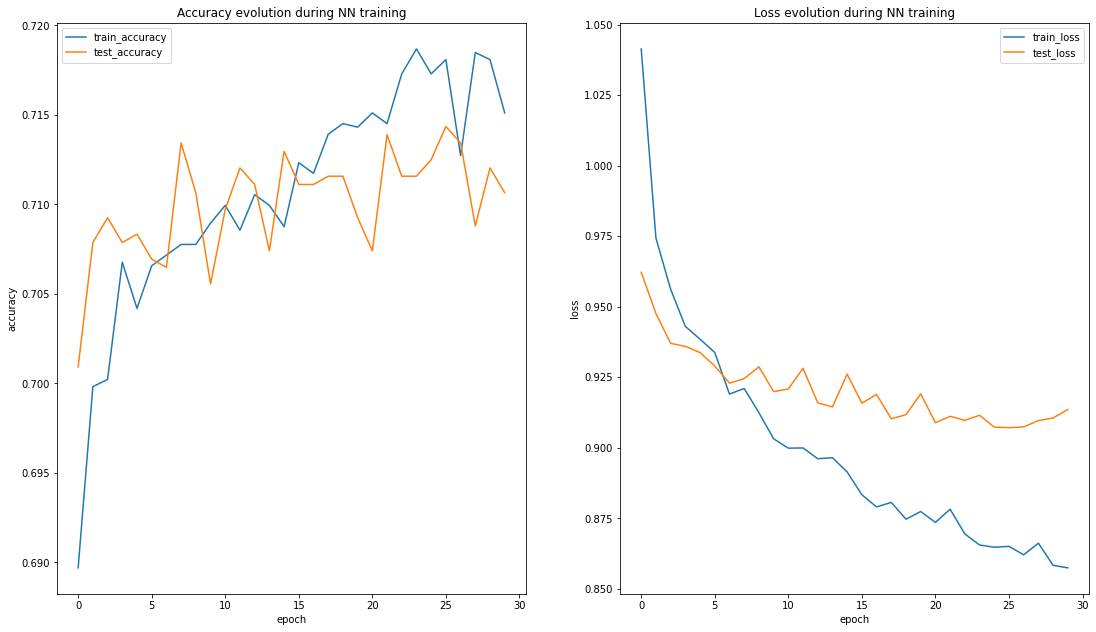

Test loss: 0.9135689735412598
Test accuracy: 0.7106481194496155


In [113]:
story = model.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))#there is a better solution to it
score = model.evaluate(X_test, y_test, verbose=0)
show_history(story)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### more on optimizers

So far we have mainly been looking at the SGD as our optimization algorithm, but there are many more: Adam, RMSprop, Adagrad, etc. (some more info here http://ruder.io/optimizing-gradient-descent/). Like other tools they all have their strengths and weaknesses. We will look more into Adam:

In [122]:
model = keras.Sequential()
model.add(layers.Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed), input_shape=(35,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(nb_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.05),
              metrics=['accuracy'])

story = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=60,
                    verbose=0,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 128)               4608      
                                                                 
 dropout_72 (Dropout)        (None, 128)               0         
                                                                 
 dense_123 (Dense)           (None, 128)               16512     
                                                                 
 dropout_73 (Dropout)        (None, 128)               0         
                                                                 
 dense_124 (Dense)           (None, 6)                 774       
                                                                 
Total params: 21,894
Trainable params: 21,894
Non-trainable params: 0
_________________________________________________________________


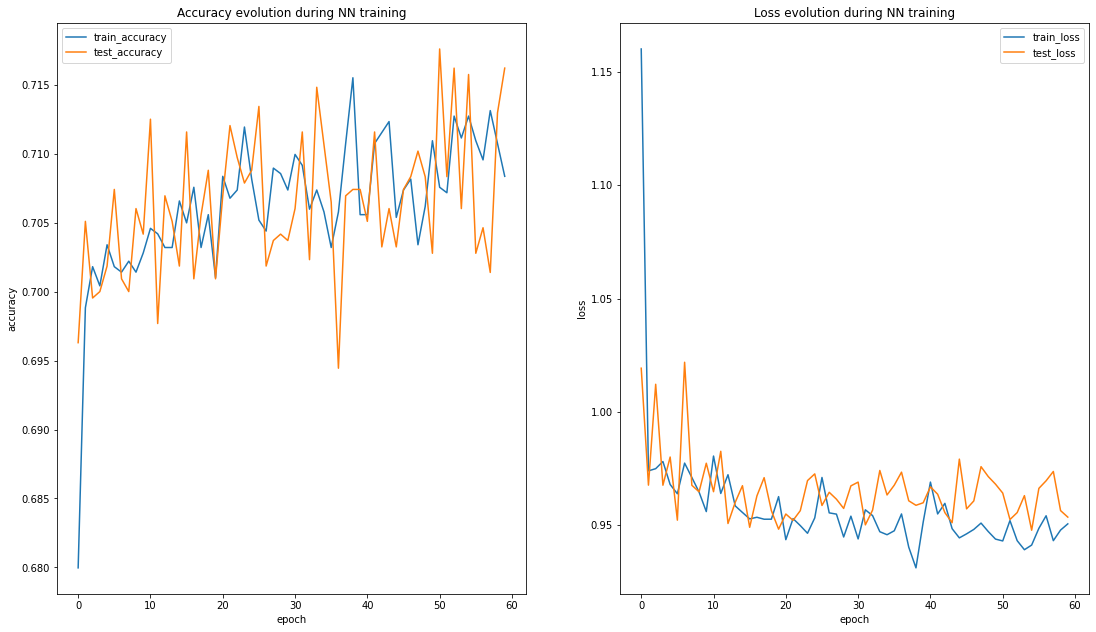

Test loss: 0.9535205960273743
Test accuracy: 0.7162036895751953


In [92]:
show_history(story)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### 10: momentum and learning rate


Learning rate has been overlooked for a while but currently a lot of research is looking into it.
Lower LR takes more time but allows better allocation of local minimum, higher LR allows faster calculations but drastic jumps do not always yield good results. However, learning rate doesn't have to be remained constant. We will try different learning rate schedules for our NN.

The SGD optimization algorithm in Keras has an argument called **decay**. This argument is used in the time-based learning rate decay schedule equation as follows:
LearningRate = LearningRate * 1/(1 + decay * epoch) (if decay=0 then there is no change)

Another term to know is **momentum**. Use a large momentum. Using a larger momentum value will help the optimization algorithm to continue to make updates in the right direction when your learning rate shrinks to small values.

$$\Delta  W_k(i) = -\eta  \frac{\partial E}{\partial W_k} + \mu  \Delta W_k(i-1)$$


$\mu$ is a momentum term here. Imagine if at some point gradient is zero, it would put the backpropagation to stall. Here momentum comes to the rescue - the algorithm remembers its last step, and adds some proportion of it to the current step. This way, even if the algorithm is stuck in a flat region, or a small local minimum, it can get out and continue towards the global minimum. So learning rate measures how much the current situation affects the next step, while momentum measures how much past steps affect the next step. 



In [130]:
model = keras.Sequential()
model.add(layers.Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed), input_shape=(35,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(nb_classes, activation='softmax'))
# Compile model
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = keras.optimizers.SGD(learning_rate=learning_rate, decay=decay_rate, nesterov=False, momentum=momentum)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
story = model.fit(X_train, y_train, #name model differently
                    batch_size=56,
                    epochs=epochs*2,
                    verbose=0,
                 validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

Test loss: 0.9110918045043945
Test accuracy: 0.717129647731781


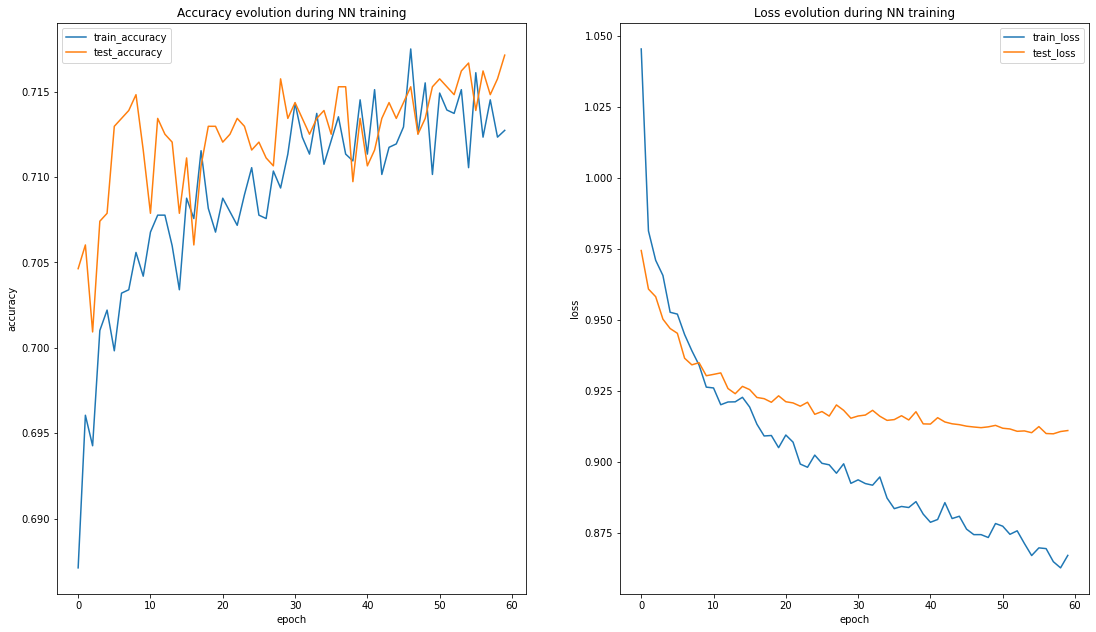

In [131]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])
show_history(story)

## Early stopping

In [128]:
from keras.callbacks import EarlyStopping
cb=EarlyStopping(monitor='val_loss', min_delta=0.1, verbose=0, patience=10, restore_best_weights=True) #difference of loss is below min_delta, it is quantified as no improvement
story = model.fit(X_train, y_train, #name model differently
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[cb])
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/30
90/90 [==============================] - 0s 4ms/step - loss: 0.8672 - accuracy: 0.7149 - val_loss: 0.9118 - val_accuracy: 0.7116
Epoch 2/30
90/90 [==============================] - 0s 3ms/step - loss: 0.8634 - accuracy: 0.7147 - val_loss: 0.9128 - val_accuracy: 0.7134
Epoch 3/30
90/90 [==============================] - 0s 3ms/step - loss: 0.8656 - accuracy: 0.7175 - val_loss: 0.9120 - val_accuracy: 0.7130
Epoch 4/30
90/90 [==============================] - 0s 3ms/step - loss: 0.8718 - accuracy: 0.7177 - val_loss: 0.9115 - val_accuracy: 0.7134
Epoch 5/30
90/90 [==============================] - 0s 3ms/step - loss: 0.8637 - accuracy: 0.7155 - val_loss: 0.9121 - val_accuracy: 0.7144
Epoch 6/30
90/90 [==============================] - 0s 3ms/step - loss: 0.8691 - accuracy: 0.7119 - val_loss: 0.9117 - val_accuracy: 0.7134
Epoch 7/30
90/90 [==============================] - 0s 3ms/step - loss: 0.8638 - accuracy: 0.7195 - val_loss: 0.9125 - val_accuracy: 0.7139
Epoch 8/30
90/90 [==

Test loss: 0.9118472337722778
Test accuracy: 0.7115740776062012


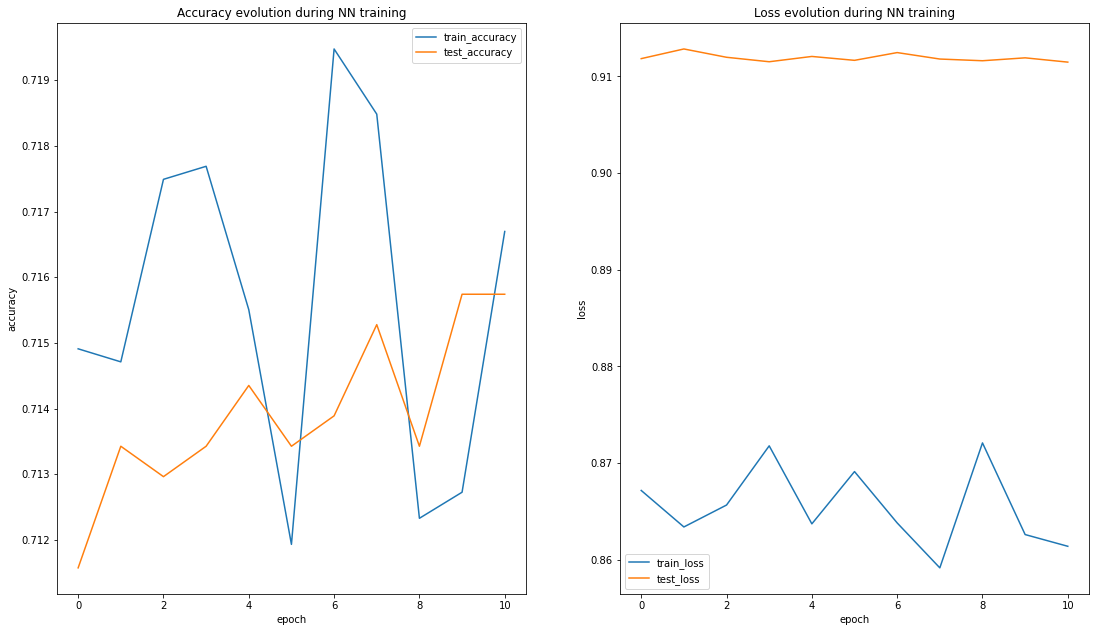

In [129]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])
show_history(story)